<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/AI_W9_FRI_31_03_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#keras.datasets.cifar10.load_data
#(x_train,y_train),(x_test,y_test)
### 0-airplane, 1-automobile, 2-bird, 3-cat, 4-deer, 5-dog, 6-frog, 7-horse, 8-ship, 9-truck

In [47]:
from keras.datasets import cifar10
from keras.saving.legacy.save import load_model
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
x_test.shape
y_test.shape
# 50000: số tấm ảnh, kích thước 32x32, 3 kênh

(50000, 32, 32, 3)
(50000, 1)


(10000, 1)

Vật này là:  [7]


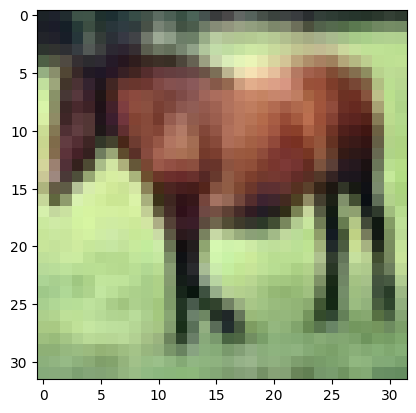

In [48]:
digit = x_train[7]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('Vật này là: ', y_train[7])

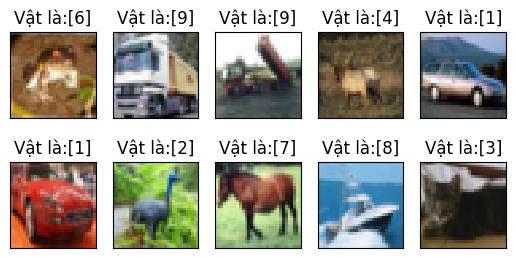

In [49]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout
  plt.imshow(x_train[i],cmap='gray',
             interpolation='none')
  plt.title('Vật là:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [50]:
from keras.models import Sequential   #Sequential mô tả ANN theo thuần tự
                                      #các lớp kế tiếp liên tục nhau
from keras.layers import Dense        #Dense=full_connected (sự kết nối đầy đủ)
import numpy as np

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))  
#512 noron là output đồng thời là input nên không cần khai báo nũa
model.add(Dense(10,activation='Softmax')) #output
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               1573376   
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [51]:
x_train = x_train.reshape(50000,32*32*3)  #chỉnh lại kích thước số dữ liệu đầu vào 
x_train = x_train.astype('float32')/255   #chuyển qua float để có thể chia được (dữ liệu từ 0->1)

x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [52]:
from keras.utils import to_categorical    #to_categorical: chuyển từ 1 bit thành nhiều bit đầu ra 
y_train = to_categorical(y_train, num_classes = 10)  #từ 1 bit thành 10 bit
y_test = to_categorical(y_test, num_classes = 10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [53]:
model.compile(optimizer='adam',loss='categorical_crossentropy',  
              metrics=['accuracy']) 
 # Có thể sử dụng optimizer rmsprop hoặc Adam đều được. Nhưng đối với dữ liệu nhiều chiều thì Adam sẽ cho kết quả tốt hơn
model.fit(x_train,y_train,epochs=10,batch_size=128)   
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/10
391/391 [==============================] - 14s 34ms/step - loss: 1.9421 - accuracy: 0.3239
Epoch 2/10
391/391 [==============================] - 14s 36ms/step - loss: 1.7251 - accuracy: 0.3894
Epoch 3/10
391/391 [==============================] - 14s 36ms/step - loss: 1.6402 - accuracy: 0.4222
Epoch 4/10
391/391 [==============================] - 14s 35ms/step - loss: 1.5886 - accuracy: 0.4404
Epoch 5/10
391/391 [==============================] - 14s 37ms/step - loss: 1.5528 - accuracy: 0.4495
Epoch 6/10
391/391 [==============================] - 14s 36ms/step - loss: 1.5272 - accuracy: 0.4600
Epoch 7/10
391/391 [==============================] - 14s 37ms/step - loss: 1.4973 - accuracy: 0.4718
Epoch 8/10
391/391 [==============================] - 14s 35ms/step - loss: 1.4686 - accuracy: 0.4797
Epoch 9/10
391/391 [==============================] - 14s 35ms/step - loss: 1.4523 - accuracy: 0.4875
Epoch 10/10
313/313 [==============================] - 2s 7ms/step - loss: 1.4797 

In [54]:
model.save('test1.h5')  #lưu file

In [55]:
model10 = load_model('test1.h5')

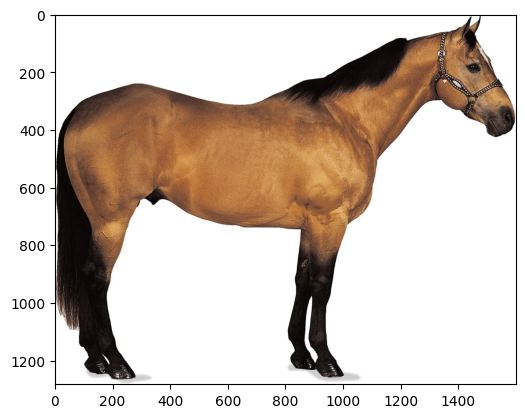

In [56]:
img = plt.imread('horse.jpg')
plt.imshow(img)
plt.show()

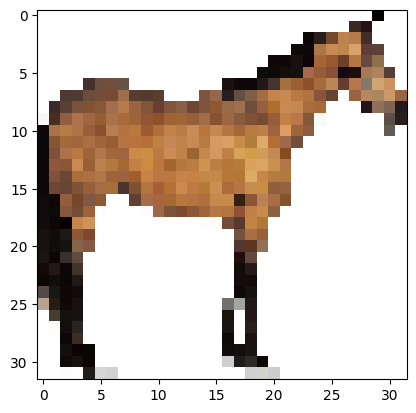

1/1 [==============================] - 0s 63ms/step
7
Label:  horse


In [57]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('horse.jpg', target_size = (32,32))  #target_size: chỉnh kích thước ảnh mong muốn

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img / 255

plt.imshow(img.reshape(32,32,3))
plt.show()

matrix = np.argmax(model.predict(img),axis = -1)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
temp = matrix[0]
print(temp)
print("Label: ", classes[temp])